# Health Insurance Cross Sell Prediction

## Overview 

The client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

## Problems

Sales of vehicle insurance are less than optimal, making clients need help from us as Data Scientists to see the most suitable market for buying this insurance. 

## Goals
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

##  Data Explanation
1. id =   Unique ID for the customer
2. Gender =  Gender of the customer
3. Age = Age of the customer
4. Driving_License = 0 : Customer does not have DL, 1 : Customer already has DL
5. Region_Code = Unique code for the region of the customer
6. Previously_Insured = 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
7. Vehicle_Age = Age of the Vehicle
8. Vehicle_Damage = 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
9. Annual_Premium = The amount customer needs to pay as premium in the year
10. PolicySalesChannel = Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
11. Vintage = Number of Days, Customer has been associated with the company
12. Response = 1 : Customer is interested, 0 : Customer is not interested



### 1. Import Common Package

In [2]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 2. Import Data

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 3. Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.drop(columns='id', inplace=True)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### 4. Untuk Mengecek Data Balance atau Imbalance

In [9]:
(pd.crosstab(index=df['Response'], columns='Jumlah', normalize=True)*100).round(2)

col_0,Jumlah
Response,
0,87.74
1,12.26


- Terdapat 87.74% Orang tidak tertarik Asuransi
- Terdapat 12.26% Orang tertarik Asuransi


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [11]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [12]:
insuranceDesc = []

for i in df.columns:
    insuranceDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum()) / len(df)) * 100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [13]:
pd.DataFrame(data = insuranceDesc, columns= [
                                'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
] )

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Gender,object,0,0.0,2,"[Female, Male]"
1,Age,int64,0,0.0,66,"[66, 26]"
2,Driving_License,int64,0,0.0,2,"[0, 1]"
3,Region_Code,float64,0,0.0,53,"[4.0, 10.0]"
4,Previously_Insured,int64,0,0.0,2,"[1, 0]"
5,Vehicle_Age,object,0,0.0,3,"[< 1 Year, > 2 Years]"
6,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
7,Annual_Premium,float64,0,0.0,48838,"[32438.0, 74004.0]"
8,Policy_Sales_Channel,float64,0,0.0,155,"[133.0, 82.0]"
9,Vintage,int64,0,0.0,290,"[26, 55]"


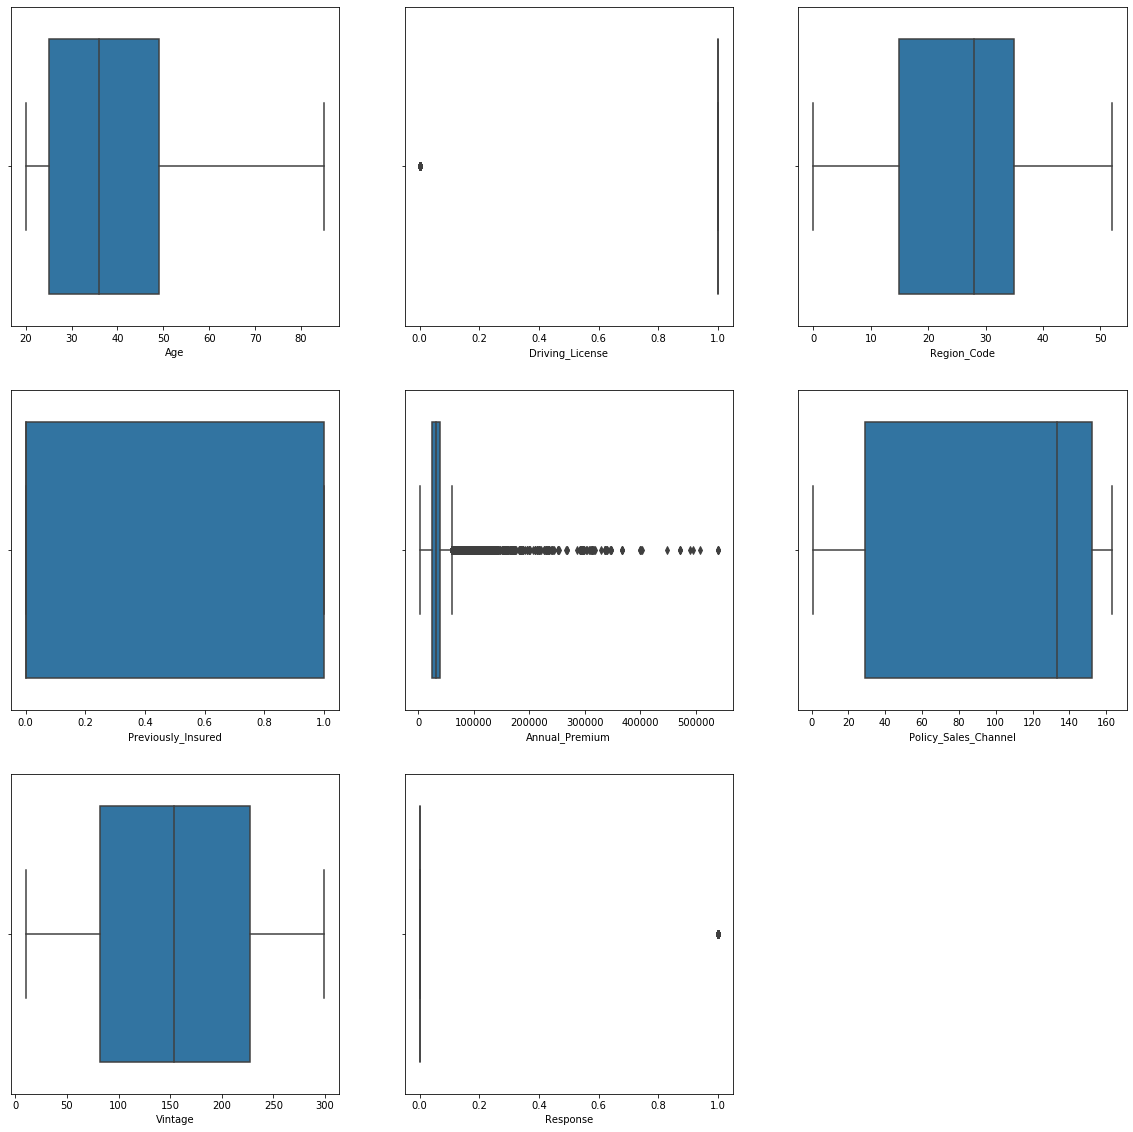

In [14]:
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.describe().columns:
    plt.subplot(3,3,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

In [15]:
df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85],
      dtype=int64)

### 5.EDA 

### Univariate

#### Gender

In [16]:
df.stb.freq(['Gender'], cum_cols = False)

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


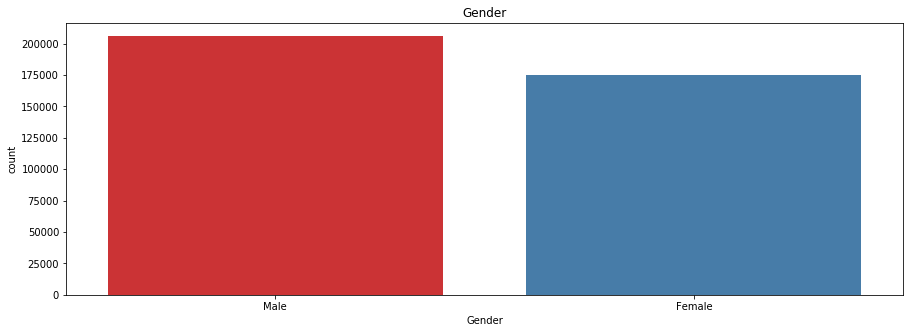

In [17]:
plt.figure(figsize = (15,5))
sns.countplot(df['Gender'], palette='Set1')
plt.title("Gender")


plt.show()


Pelanggan asuransi didominasi oleh Gender Laki-laki dengan persentase sebesar 54.07613%

#### Age

In [18]:
df.stb.freq(['Age'], cum_cols = False).head()

,Age,count,percent
0,24,25960,6.811700
1,23,24256,6.364583
2,22,20964,5.500788
3,25,20636,5.414724
4,21,16457,4.318187


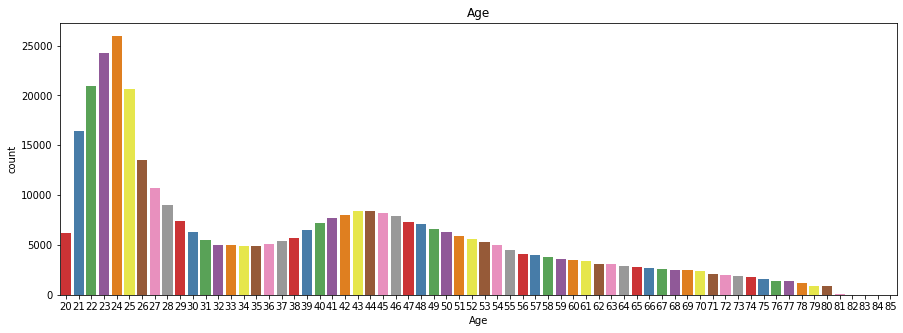

In [19]:
plt.figure(figsize = (15,5))
sns.countplot(df['Age'], palette='Set1')
plt.title("Age")


plt.show()

Berdasarkan umur, Pelanggan asuransi didominasi oleh pelanggan yang berusia 24 tahun dengan persentase sebesar 6.811700%

#### License

In [20]:
df.stb.freq(['Driving_License'], cum_cols = False)

,Driving_License,count,percent
0,1,380297,99.786938
1,0,812,0.213062


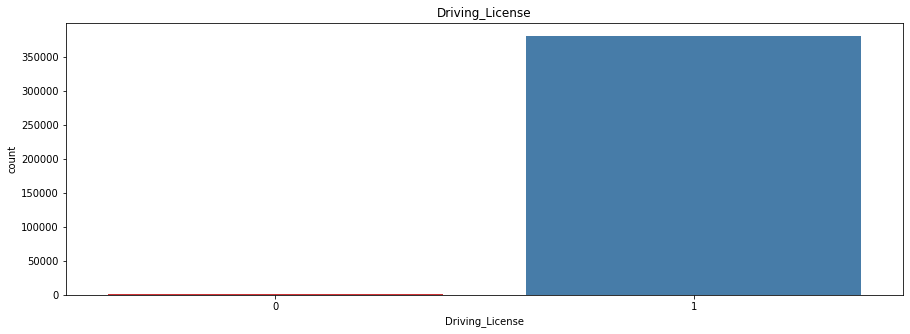

In [58]:
plt.figure(figsize = (15,5))
sns.countplot(df['Driving_License'], palette='Set1')
plt.title("Driving_License")


plt.show()

Berdasarkan kepemilikan SIM, sebanyak 99.786938% Pelanggan asuransi memiliki SIM

#### Region Code


In [21]:
df.stb.freq(['Region_Code'], cum_cols = False).head()


,Region_Code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914


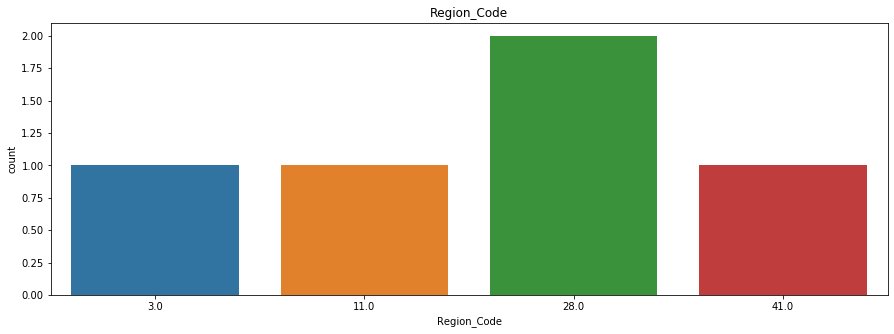

In [22]:
# f['Region_Code'].sort_values(ascending=False)
plt.figure(figsize = (15,5))
sns.countplot(df['Region_Code'].head())
plt.title("Region_Code")


plt.show()

Berdasarkan Region Code, pelanggan terbanyak ada di region 28

#### Previously Insured

In [23]:
df.stb.freq(['Previously_Insured'], cum_cols = False).head()


,Previously_Insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


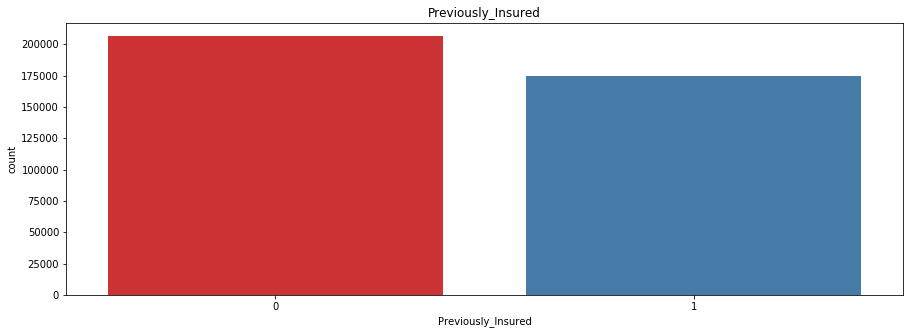

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(df['Previously_Insured'], palette='Set1')
plt.title("Previously_Insured")


plt.show()

berdasarkan hasil analisis mengenai kepemilikan asuransi sebelumnya, lebih banyak pelanggan yg belum memiliki asuransi dibangding yang sebelumnya memiliki asuransi dengan persentase 54,2%

#### Vehicle Age

In [25]:
df.stb.freq(['Vehicle_Age'], cum_cols = False).head()


,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


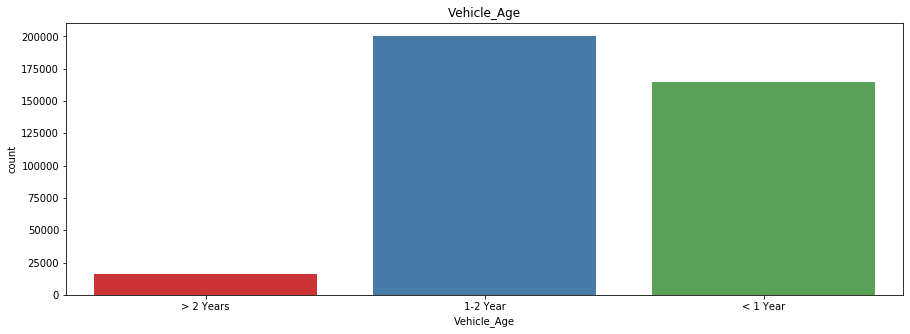

In [26]:
plt.figure(figsize = (15,5))
sns.countplot(df['Vehicle_Age'], palette='Set1')
plt.title("Vehicle_Age")


plt.show()

Dari penilaian mengenai lamanya kendaraan yang dimiliki pelanggan, di dominasi oleh 52.5% Pelanggan memiliki kendaraan yang rentang umurnya 1-2 tahun

#### Vehicle Damage

In [30]:
df.stb.freq(['Vehicle_Damage'], cum_cols = False).head()


,Vehicle_Damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


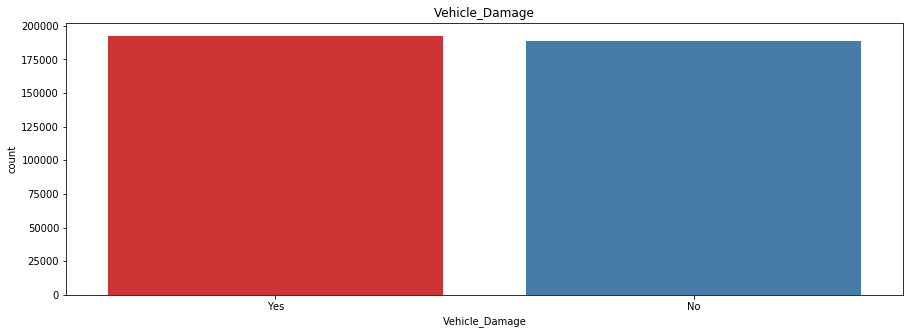

In [63]:
plt.figure(figsize = (15,5))
sns.countplot(df['Vehicle_Damage'], palette='Set1')
plt.title("Vehicle_Damage")


plt.show()

Dari total populasi, 50.3 % Pelanggan pernah mengalami kecelakaan kendaraan

#### Annual Premium

In [18]:
df.stb.freq(['Annual_Premium'], cum_cols = False).head()


,Annual_Premium,count,percent
0,2630.0,64877,17.023214
1,69856.0,140,0.036735
2,39008.0,41,0.010758
3,45179.0,38,0.009971
4,38287.0,38,0.009971


17,5% pelanggan membayar annual premium sebesar 2630

#### Policy Sales Channel

In [19]:
df.stb.freq(['Policy_Sales_Channel'], cum_cols = False).head()


,Policy_Sales_Channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


35% Pelanggan memilih polis 152

#### Response

In [20]:
df.stb.freq(['Response'], cum_cols = False).head()


,Response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


- Terdapat 87.74% Orang tidak tertarik Asuransi
- Terdapat 12.26% Orang tertarik Asuransi


### Multivariate

In [27]:
### Proses Binning Age
age_bin = [18, 35,45, 60, df['Age'].max()] ## Menentukan Kelompok Usia

In [28]:
labels_age = ['18-35', '36-45','46-60', '60<'] ## memberi nama pada kelompok usia

In [29]:
df['age_bin'] = pd.cut(df['Age'], bins=age_bin, labels = labels_age)

### Age_bin dengan Response

In [30]:
(pd.crosstab(index=df['age_bin'], columns=df['Response'], normalize=True)*100).round(2)

Response,0,1
age_bin,,
18-35,45.81,3.21
36-45,14.52,3.99
46-60,17.17,3.96
60<,10.25,1.10


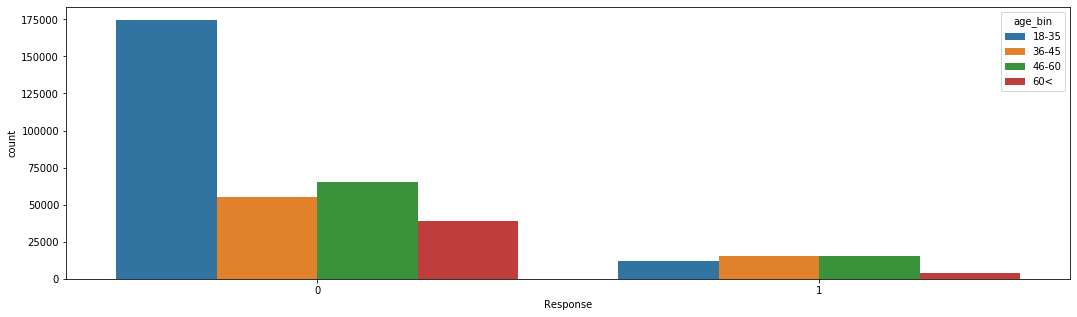

In [31]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Response'], hue = df['age_bin'])
plt.show()

Yang paling tertarik mendaftar asuransi adalah pelanggan dengan kelompok umur 36-45 dengan persentase 3.99% 


### Gender dengan Response

In [32]:
(pd.crosstab(index=df['Gender'], columns=df['Response'], normalize=True)*100).round(2)

Response,0,1
Gender,,
Female,41.15,4.77
Male,46.59,7.48


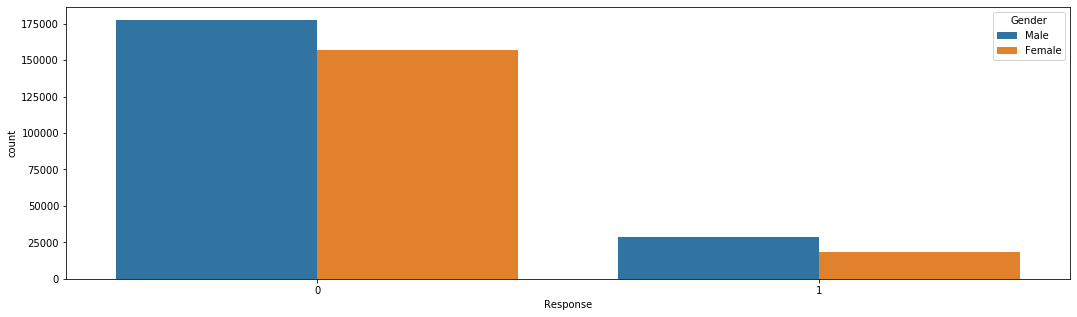

In [33]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Response'], hue = df['Gender'])
plt.show()

Yang paling tertarik mendaftar asuransi adalah pelanggan berjenis kelamin Pria dengan persentase 7.48% 


### Response dengan Vehicle_Damage

In [34]:
(pd.crosstab(columns=df['Response'], index=df['Vehicle_Damage'], normalize=True)*100).round(2)


Response,0,1
Vehicle_Damage,,
No,49.25,0.26
Yes,38.49,12.00


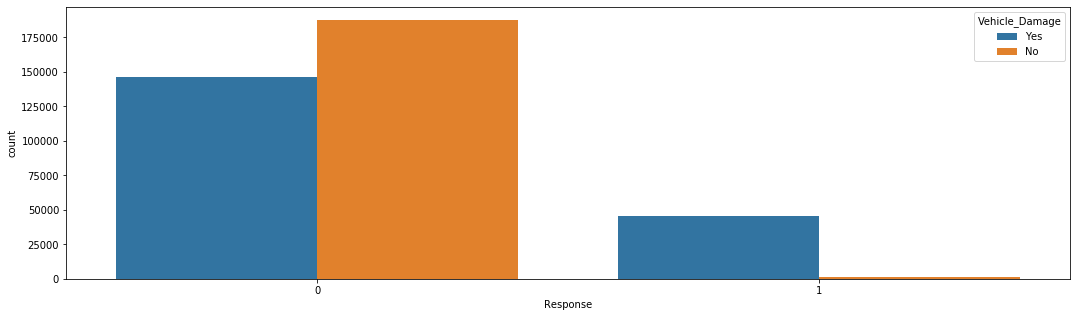

In [83]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Response'], hue = df['Vehicle_Damage'])
plt.show()

### Response dengan Vehicle_age

In [85]:
(pd.crosstab(columns=df['Response'], index=df['Vehicle_Age'], normalize=True)*100).round(2)


Response,0,1
Vehicle_Age,,
1-2 Year,43.43,9.13
< 1 Year,41.35,1.89
> 2 Years,2.97,1.23


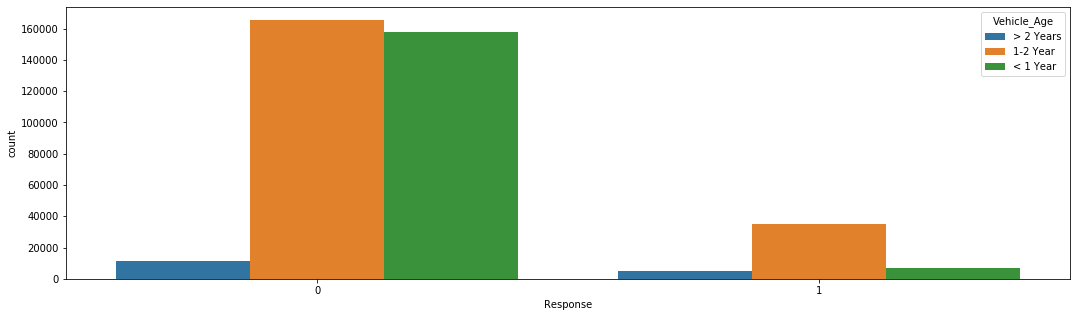

In [35]:
plt.figure(figsize = (18, 5))
sns.countplot(df['Response'], hue = df['Vehicle_Age'])
plt.show()

## 6. Data Preprosessing

In [36]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'age_bin'],
      dtype='object')

### Feature Engineering 

In [37]:
## Label Encoding Gender
df['Gender'] = df['Gender'].map({
    'Male' : 0,
    'Female' : 1
})

In [38]:
## Label Age bin
df['age_bin'] = df['age_bin'].map({
    '18-35' : 0,
    '36-45' : 1,
    '46-60' :2,
    '60<': 3
})

In [39]:
## Label Vehicle Age
df['Vehicle_Age'] = df['Vehicle_Age'].map({
    '> 2 Years' : 0,
    '1-2 Year' : 1,
    '< 1 Year' : 2
})

In [40]:
## Label Vehicle Damage
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({
    'Yes' : 0,
    'No' : 1
})

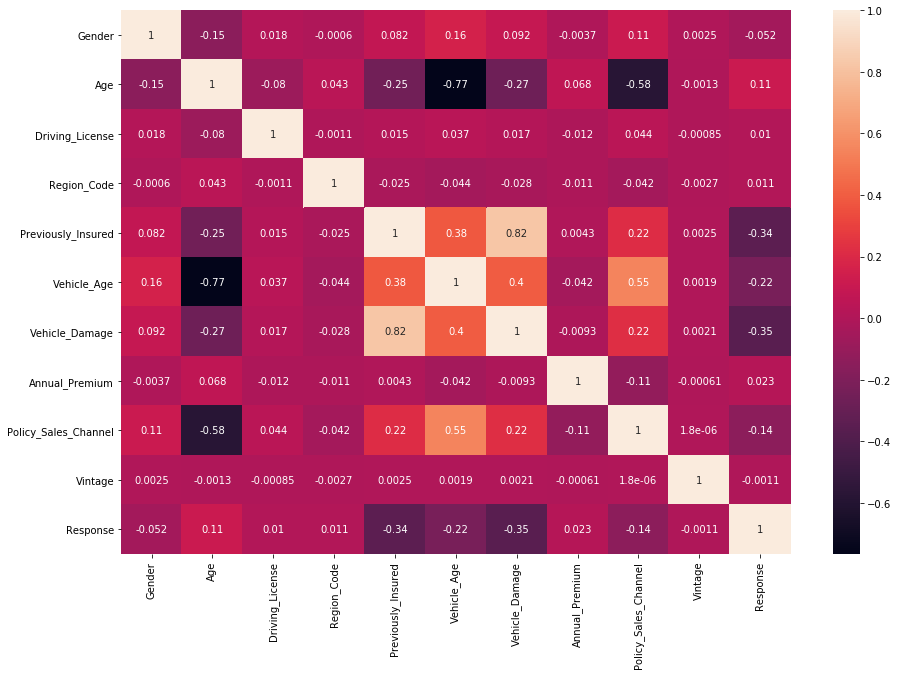

In [41]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [42]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Vehicle_Age            -0.221874
Previously_Insured     -0.341170
Vehicle_Damage         -0.354400
Name: Response, dtype: float64

In [43]:
#tidak menggunakan annual premium karna tidak ada informasi jelas mengenai produk berdasarkan harganya
df.drop(columns='Annual_Premium', inplace=True)

In [44]:
#tidak menggunakan Region Code dan policy karena tidak ada informasi jelas mengenai region code dan policy
df.drop(columns=['Region_Code','Policy_Sales_Channel'], inplace=True) 


In [45]:
# tidak menggunakan columns age karena age sudah di ubah ke bining
df.drop(columns="Age", inplace = True)

In [46]:
df.head()

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Vintage,Response,age_bin
0,0,1,0,0,0,217,1,1
1,0,1,0,1,1,183,0,3
2,0,1,0,0,0,27,1,2
3,0,1,1,2,1,203,0,0
4,1,1,1,2,1,39,0,0


### Splitting Data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop(columns='Response')
y = df['Response']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, stratify = y,random_state = 42)

### Marchine Learning Modeling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [60]:
# Handling Imbalance data menggunakan Random Over Sampling

In [51]:
from sklearn.utils import resample

In [52]:
non_respon = df[df['Response'] == 0] ## Kelas Majority
respon = df[df['Response'] == 1] ## Kelas Minority

In [53]:
respon_oversample = resample(respon, ## Kelas Minority
                           replace=True,
                           n_samples = len(non_respon), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [54]:
df_OverSampled = pd.concat([non_respon, respon_oversample])

In [55]:
df_OverSampled['Response'].value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [56]:
X_train_OverSample = df_OverSampled.drop(columns='Response')
y_train_OverSample = df_OverSampled['Response']

In [68]:
#Algorithms

#Logistic Regression
Logreg = LogisticRegression()
Logreg.fit(X_train_OverSample, y_train_OverSample)
Logreg_predtrain = Logreg.predict(X_train_OverSample)
Logreg_predtest = Logreg.predict(X_test)




In [69]:
#KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train_OverSample, y_train_OverSample)
KNN_predtrain = KNN.predict(X_train_OverSample)
KNN_predtest = KNN.predict(X_test)



In [70]:
# Random Forest Classifier
RanFor = RandomForestClassifier()
RanFor.fit(X_train_OverSample, y_train_OverSample)
RanForPredTrain = RanFor.predict(X_train_OverSample)
RanForPredTest = RanFor.predict(X_test)



In [71]:
# Xgradient Boosting
xgb = GradientBoostingClassifier()
xgb.fit(X_train_OverSample, y_train_OverSample)
xgbPredTrain = xgb.predict(X_train_OverSample)
xgbPredTest = xgb.predict(X_test)

In [72]:
X_train_OverSample.shape

(668798, 7)

In [73]:
y_train_OverSample.shape

(668798,)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

### Logistic Regression Model Building

Hasil Classification Logistic Regression Test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix Logistic Regression


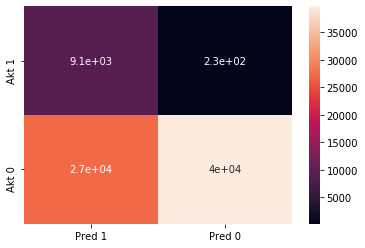

,Pred 1,Pred 0
Akt 1,9114,228
Akt 0,27205,39675


In [79]:
#logreg Train
acc_logreg_Train = accuracy_score(y_train_OverSample, Logreg_predtrain)
recall_logreg_Train = recall_score(y_train_OverSample, Logreg_predtrain)
prec_logreg_Train = precision_score(y_train_OverSample, Logreg_predtrain)
f1_logreg_Train = f1_score(y_train_OverSample, Logreg_predtrain)

#Logreg Test
acc_logreg = accuracy_score(y_test, Logreg_predtest)
recall_logreg = recall_score(y_test, Logreg_predtest)
prec_logreg = precision_score(y_test, Logreg_predtest)
f1_logreg = f1_score(y_test, Logreg_predtest)

print("Hasil Classification Logistic Regression Test")
print(classification_report(y_test, Logreg_predtest))

cm_OS = confusion_matrix(y_test, Logreg_predtest, labels=[1 , 0])
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
print('='*100)
print("Confusion Matrix Logistic Regression")
sns.heatmap(df_OS, annot=True)
plt.show()
df_OS

### KNN Classifier

Hasil Classification KNN Test
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     66880
           1       0.27      0.84      0.41      9342

    accuracy                           0.71     76222
   macro avg       0.62      0.76      0.61     76222
weighted avg       0.88      0.71      0.76     76222

Confusion Matrix KNN


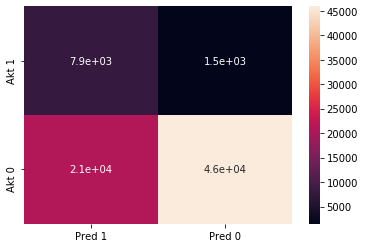

,Pred 1,Pred 0
Akt 1,7875,1467
Akt 0,20977,45903


In [80]:
#KNN Train
acc_KNN_Train = accuracy_score(y_train_OverSample, KNN_predtrain)
recall_KNN_Train = recall_score(y_train_OverSample, KNN_predtrain)
prec_KNN_Train = precision_score(y_train_OverSample, KNN_predtrain)
f1_KNN_Train = f1_score(y_train_OverSample, KNN_predtrain)

#KNN Test
acc_KNN = accuracy_score(y_test, KNN_predtest)
recall_KNN = recall_score(y_test, KNN_predtest)
prec_KNN = precision_score(y_test, KNN_predtest)
f1_KNN = f1_score(y_test, KNN_predtest)

print("Hasil Classification KNN Test")
print(classification_report(y_test, KNN_predtest))
cm_OS = confusion_matrix(y_test, KNN_predtest, labels=[1 , 0])
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
print('='*100)
print("Confusion Matrix KNN")
sns.heatmap(df_OS, annot=True)
plt.show()
df_OS

### Random Forest Classifier

Hasil Classification Random Forest Test
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     66880
           1       0.27      0.95      0.42      9342

    accuracy                           0.68     76222
   macro avg       0.63      0.80      0.60     76222
weighted avg       0.90      0.68      0.74     76222

Confusion Matrix Random Forest


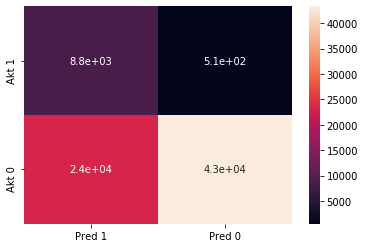

,Pred 1,Pred 0
Akt 1,8832,510
Akt 0,23557,43323


In [77]:
# Random Forest Train
acc_RF_Train = accuracy_score(y_train_OverSample, RanForPredTrain)
recall_RF_Train = recall_score(y_train_OverSample, RanForPredTrain)
prec_RF_Train = precision_score(y_train_OverSample, RanForPredTrain)
f1_RF_Train = f1_score(y_train_OverSample, RanForPredTrain)

#Random Forest Test
acc_RF = accuracy_score(y_test, RanForPredTest)
recall_RF = recall_score(y_test, RanForPredTest)
prec_RF = precision_score(y_test, RanForPredTest)
f1_RF = f1_score(y_test, RanForPredTest)

print("Hasil Classification Random Forest Test")
print(classification_report(y_test, RanForPredTest))
cm_OS = confusion_matrix(y_test, RanForPredTest, labels=[1 , 0])
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
print('='*100)
print("Confusion Matrix Random Forest")
sns.heatmap(df_OS, annot=True)
plt.show()
df_OS

Hasil Classification XGB Test
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Confusion Matrix XGB


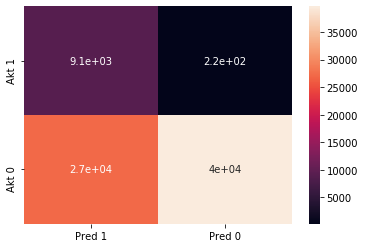

,Pred 1,Pred 0
Akt 1,9125,217
Akt 0,27217,39663


In [78]:
# XGB Train
acc_XGB_Train = accuracy_score(y_train_OverSample, xgbPredTrain)
recall_XGB_Train = recall_score(y_train_OverSample, xgbPredTrain)
prec_XGB_Train = precision_score(y_train_OverSample, xgbPredTrain)
f1_XGB_Train = f1_score(y_train_OverSample, xgbPredTrain)

# XGB Test
acc_XGB = accuracy_score(y_test, xgbPredTest)
recall_XGB = recall_score(y_test, xgbPredTest)
prec_XGB = precision_score(y_test, xgbPredTest)
f1_XGB = f1_score(y_test, xgbPredTest)
print("Hasil Classification XGB Test")
print(classification_report(y_test, xgbPredTest))
cm_OS = confusion_matrix(y_test, xgbPredTest, labels=[1 , 0])
df_OS = pd.DataFrame(data=cm_OS, index=["Akt 1" ,"Akt 0"], columns=["Pred 1", "Pred 0"])
print('='*100)
print("Confusion Matrix XGB")
sns.heatmap(df_OS, annot=True)
plt.show()
df_OS

In [81]:
data = {
    "Logreg Train" : [acc_logreg_Train, prec_logreg_Train, recall_logreg_Train, f1_logreg_Train],    
    "Logreg Test" : [acc_logreg, prec_logreg, recall_logreg, f1_logreg],
    "KNN Train" : [acc_KNN_Train, prec_KNN_Train, recall_KNN_Train, f1_KNN_Train],
    "KNN Test" : [acc_KNN, prec_KNN, recall_KNN, f1_KNN],
    "Random Forest Train" : [acc_RF_Train, prec_RF_Train, recall_RF_Train, f1_RF_Train],    
    "Random Forest Test" : [acc_RF, prec_RF, recall_RF, f1_RF],
    "XGB Train": [acc_XGB_Train, prec_XGB_Train, recall_XGB_Train, f1_XGB_Train],
    "XGB Test": [acc_XGB, prec_XGB, recall_XGB, f1_XGB]
}
eva = pd.DataFrame(data=data, index =['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

,Logreg Train,Logreg Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,XGB Train,XGB Test
Accuracy,0.783411,0.640091,0.763053,0.705544,0.797863,0.684251,0.784397,0.640078
Precision,0.705015,0.250943,0.727566,0.272945,0.728776,0.272685,0.705363,0.251087
Recall,0.974608,0.975594,0.841022,0.842967,0.948855,0.945408,0.976821,0.976772
F1-Score,0.818176,0.399203,0.780191,0.412368,0.824380,0.423282,0.819189,0.399483


# Hyperparameter Tuning

In [84]:
from sklearn.model_selection import RandomizedSearchCV


#### Logistic Regression Tuned

In [82]:
LogregTuned = LogisticRegression()
Param_LR = {'penalty':['l2','l1', 'elasticnet'],
    "fit_intercept" : [True, False],
    "class_weight" : [True, False],
    "max_iter" : [100,200],
    "C": [1,0.5,0.1,5,9]
}


In [85]:
model_LR_tuned = RandomizedSearchCV(estimator=LogregTuned, param_distributions= Param_LR, n_jobs= -1, cv= 5, verbose= 1, scoring= 'recall')

In [86]:
model_LR_tuned.fit(X_train_OverSample, y_train_OverSample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [1, 0.5, 0.1, 5, 9],
                                        'class_weight': [True, False],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 200],
          

In [90]:
model_LR_tuned.best_params_

{'penalty': 'l2',
 'max_iter': 200,
 'fit_intercept': False,
 'class_weight': True,
 'C': 1}

In [100]:
LogRegPred_Tuned_Train = model_LR_tuned.predict(X_train_OverSample)
LogRegPred_Tuned = model_LR_tuned.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



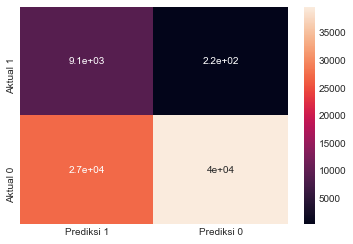

In [101]:
acc_LogRegTune_Train = accuracy_score(y_train_OverSample, LogRegPred_Tuned_Train)
prec_LogRegTune_Train = precision_score(y_train_OverSample, LogRegPred_Tuned_Train)
rec_LogRegTune_Train = recall_score(y_train_OverSample, LogRegPred_Tuned_Train)
f1_LogRegTune_Train = f1_score(y_train_OverSample, LogRegPred_Tuned_Train)

acc_LogRegTune = accuracy_score(y_test, LogRegPred_Tuned)
prec_LogRegTune = precision_score(y_test, LogRegPred_Tuned)
rec_LogRegTune = recall_score(y_test, LogRegPred_Tuned)
f1_LogRegTune = f1_score(y_test, LogRegPred_Tuned)

print(classification_report(y_test, LogRegPred_Tuned))
print (100*"=")

cm = confusion_matrix(y_test, LogRegPred_Tuned, labels = [1,0])
logreg_cm = pd.DataFrame(data = cm,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(logreg_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

#### KNN Tuned

In [93]:
KNN_tuned =  KNeighborsClassifier()
param_KNN = {"n_neighbors": [3,9,27],
             "weights": ['uniform', 'distance'],
             "p" : [1,2,3]     
            }

In [94]:
model_KNN_tuned = RandomizedSearchCV(estimator=KNN_tuned, param_distributions= param_KNN, n_jobs= -1, cv= 5, verbose= 1, scoring= 'recall')

In [95]:
model_KNN_tuned.fit(X_train_OverSample, y_train_OverSample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 9, 27],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='recall', verbose=1)

In [96]:
model_KNN_tuned.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 27}

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     66880
           1       0.26      0.93      0.41      9342

    accuracy                           0.67     76222
   macro avg       0.62      0.78      0.59     76222
weighted avg       0.90      0.67      0.73     76222



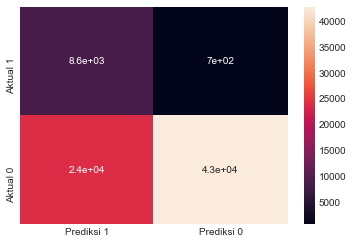

,Prediksi 1,Prediksi 0
Aktual 1,8643,699
Aktual 0,24150,42730


In [103]:
KNN_Pred_Tuned_Train = model_KNN_tuned.predict(X_train_OverSample)
acc_KNN_Tune_Train = accuracy_score(y_train_OverSample, KNN_Pred_Tuned_Train)
prec_KNN_Tune_Train = precision_score(y_train_OverSample, KNN_Pred_Tuned_Train)
rec_KNN_Tune_Train = recall_score(y_train_OverSample, KNN_Pred_Tuned_Train)
f1_KNN_Tune_Train = f1_score(y_train_OverSample, KNN_Pred_Tuned_Train)

KNN_Pred_Tuned = model_KNN_tuned.predict(X_test)
acc_KNN_Tune = accuracy_score(y_test, KNN_Pred_Tuned)
prec_KNN_Tune = precision_score(y_test, KNN_Pred_Tuned)
rec_KNN_Tune = recall_score(y_test, KNN_Pred_Tuned)
f1_KNN_Tune = f1_score(y_test, KNN_Pred_Tuned)

print(classification_report(y_test, KNN_Pred_Tuned))
print (100*"=")

cm = confusion_matrix(y_test, KNN_Pred_Tuned, labels = [1,0])
KNN_cm = pd.DataFrame(data = cm,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(KNN_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()
print(100*('='))
KNN_cm

#### Random Forest Tuned

In [104]:
RF_tuned =  RandomForestClassifier()
param_RF = {"n_estimators": [3,9,27],
            "max_depth" :[1,3,5],
            "min_samples_leaf": [3,6,9],
            "min_samples_split" : [6,12,18]
            }
model_RF_tuned = RandomizedSearchCV(estimator=RF_tuned, param_distributions= param_RF, n_jobs= -1, cv= 5, verbose= 1, scoring= 'recall')

In [105]:
model_RF_tuned.fit(X_train_OverSample, y_train_OverSample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   47.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [106]:
model_RF_tuned.best_params_

{'n_estimators': 9,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': 3}

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



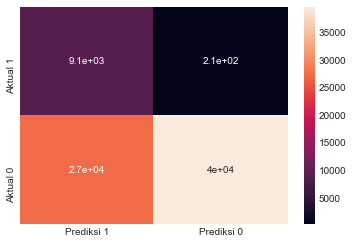

,Prediksi 1,Prediksi 0
Aktual 1,9130,212
Aktual 0,27297,39583


In [107]:
#RF Tuned train
RF_Pred_Tuned_Train = model_RF_tuned.predict(X_train_OverSample)
acc_RF_Tune_Train = accuracy_score(y_train_OverSample, RF_Pred_Tuned_Train)
prec_RF_Tune_Train = precision_score(y_train_OverSample, RF_Pred_Tuned_Train)
rec_RF_Tune_Train = recall_score(y_train_OverSample, RF_Pred_Tuned_Train)
f1_RF_Tune_Train = f1_score(y_train_OverSample, RF_Pred_Tuned_Train)

#RF Tuned test
RF_Pred_Tuned = model_RF_tuned.predict(X_test)
acc_RF_Tune = accuracy_score(y_test, RF_Pred_Tuned)
prec_RF_Tune = precision_score(y_test, RF_Pred_Tuned)
rec_RF_Tune = recall_score(y_test, RF_Pred_Tuned)
f1_RF_Tune = f1_score(y_test, RF_Pred_Tuned)

print(classification_report(y_test, RF_Pred_Tuned))
print (100*"=")

cm = confusion_matrix(y_test, RF_Pred_Tuned, labels = [1,0])
RF_cm = pd.DataFrame(data = cm,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(RF_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()
print(100*('='))
RF_cm

#### XGradient Boosting Tuned

In [114]:
xgb_t = GradientBoostingClassifier()

param_xgb = {
    "n_estimators":[100, 150, 200]

}
model_XGB_tuned = RandomizedSearchCV(estimator=xgb_t, param_distributions= param_xgb, n_jobs= -1, cv= 5, verbose= 1, scoring= 'recall')

In [115]:
model_XGB_tuned.fit(X_train_OverSample, y_train_OverSample)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [116]:
model_XGB_tuned.best_params_

{'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



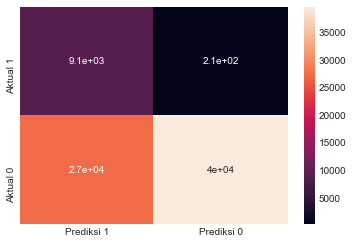

,Prediksi 1,Prediksi 0
Aktual 1,9125,217
Aktual 0,27217,39663


In [117]:
XGB_Pred_Tuned_train = model_XGB_tuned.predict(X_train_OverSample)
acc_XGB_Tune_train = accuracy_score(y_train_OverSample, XGB_Pred_Tuned_train)
prec_XGB_Tune_train = precision_score(y_train_OverSample, XGB_Pred_Tuned_train)
rec_XGB_Tune_train = recall_score(y_train_OverSample, XGB_Pred_Tuned_train)
f1_XGB_Tune_train = f1_score(y_train_OverSample, XGB_Pred_Tuned_train)

XGB_Pred_Tuned = model_XGB_tuned.predict(X_test)
acc_XGB_Tune = accuracy_score(y_test, XGB_Pred_Tuned)
prec_XGB_Tune = precision_score(y_test, XGB_Pred_Tuned)
rec_XGB_Tune = recall_score(y_test, XGB_Pred_Tuned)
f1_XGB_Tune = f1_score(y_test, XGB_Pred_Tuned)

print(classification_report(y_test, XGB_Pred_Tuned))
print (100*"=")

cm = confusion_matrix(y_test, XGB_Pred_Tuned, labels = [1,0])
XGB_cm = pd.DataFrame(data = cm,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(RF_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()
print(100*('='))
XGB_cm

In [118]:
print(" Hasil Base Model tanpa Tuning ")
data = {
    "Logreg Train" : [acc_logreg_Train, prec_logreg_Train, recall_logreg_Train, f1_logreg_Train],    
    "Logreg Test" : [acc_logreg, prec_logreg, recall_logreg, f1_logreg],
    "KNN Train" : [acc_KNN_Train, prec_KNN_Train, recall_KNN_Train, f1_KNN_Train],
    "KNN Test" : [acc_KNN, prec_KNN, recall_KNN, f1_KNN],
    "Random Forest Train" : [acc_RF_Train, prec_RF_Train, recall_RF_Train, f1_RF_Train],    
    "Random Forest Test" : [acc_RF, prec_RF, recall_RF, f1_RF],
    "XGB Train": [acc_XGB_Train, prec_XGB_Train, recall_XGB_Train, f1_XGB_Train],
    "XGB Test": [acc_XGB, prec_XGB, recall_XGB, f1_XGB]
}
eva = pd.DataFrame(data=data, index =['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva


 Hasil Base Model 


,Logreg Train,Logreg Test,KNN Train,KNN Test,Random Forest Train,Random Forest Test,XGB Train,XGB Test
Accuracy,0.783411,0.640091,0.763053,0.705544,0.797863,0.684251,0.784397,0.640078
Precision,0.705015,0.250943,0.727566,0.272945,0.728776,0.272685,0.705363,0.251087
Recall,0.974608,0.975594,0.841022,0.842967,0.948855,0.945408,0.976821,0.976772
F1-Score,0.818176,0.399203,0.780191,0.412368,0.824380,0.423282,0.819189,0.399483


In [119]:
dataTuning = {
    "Logreg Train Tuned" : [acc_LogRegTune_Train, prec_LogRegTune_Train, rec_LogRegTune_Train, f1_LogRegTune_Train],    
    "Logreg Test Tuned" : [acc_LogRegTune, prec_LogRegTune, rec_LogRegTune, f1_LogRegTune],
    "KNN Train Tuned" : [acc_KNN_Tune_Train, prec_KNN_Tune_Train, rec_KNN_Tune_Train, f1_KNN_Tune_Train],
    "KNN Test Tuned" : [acc_KNN_Tune, prec_KNN_Tune, rec_KNN_Tune, f1_KNN_Tune],
    "Random Forest Train Tuned" : [acc_RF_Tune_Train, prec_RF_Tune_Train, rec_RF_Tune_Train, f1_RF_Tune_Train],    
    "Random Forest Test Tuned" : [acc_RF_Tune, prec_RF_Tune, rec_RF_Tune, f1_RF_Tune],
    "XGB Train Tuned": [acc_XGB_Tune_train, prec_XGB_Tune_train, rec_XGB_Tune_train, f1_XGB_Tune_train],
    "XGB Test Tuned": [acc_XGB_Tune, prec_XGB_Tune, rec_XGB_Tune, f1_XGB_Tune]
}
evaTuning = pd.DataFrame(data=dataTuning, index =['Accuracy', 'Precision', 'Recall', 'F1-Score'])
evaTuning


,Logreg Train Tuned,Logreg Test Tuned,KNN Train Tuned,KNN Test Tuned,Random Forest Train Tuned,Random Forest Test Tuned,XGB Train Tuned,XGB Test Tuned
Accuracy,0.784004,0.640209,0.782474,0.673992,0.784005,0.639094,0.784397,0.640078
Precision,0.705285,0.251074,0.719392,0.263562,0.704838,0.250638,0.705363,0.251087
Recall,0.975733,0.976129,0.926238,0.925177,0.977249,0.977307,0.976821,0.976772
F1-Score,0.818754,0.399413,0.809816,0.410253,0.818985,0.398960,0.819189,0.399483


### Conclusion 


#### Eda

- Dari Total pelanggan Asuransi kesehatan, yang tertarik untuk membeli asuransi kendaraan ada sebanyak 12.25%
 dengan Pria sebanyak 7.48%
- Kebanyakan yang tertarik untuk membeli Asuransi Kendaraan adalah orang yang kendaraanya pernah mengalami kecelakaan dengan persentase 12%
- Persentase Orang yang tertarik untuk membeli asuransi kendaraan adalah orang yang usianya berada dirange 36-45 Tahun

#### Machine Learning

- pada penggunaan Machine learning pada dataset ini, untuk melakukan handling imbalancenya menggunakan Randomize Oversampling .
- Base Model yang dipaling akurat untuk memprediksi fraud dari dataset ini adalah hasil Tuning Random Forest